To start with you will need to download the SymSim package through pip.  At the time of writing this the SymSim package is on version 0.01 and is still in development.  For the most part I don't think that there will be too many changes unless there is more interest in this project.

To start with the most basic simlation "unit" is a cluster.  This isn't really a cluster rather it is a two dimensional symmetric plane.  Think of this as a set of shape functions in reciporical space which show as diffraction spots when intersected with the Ewald sphere.

I might attempt to develop some better visualization tools 

In [9]:
from SymSim.sim.clusters import get_random_cluster
from SymSim.sim.cluster import Cluster
import matplotlib.pyplot as plt
import numpy as np

In [10]:
s = Cluster()

In [11]:
s.data

array([[ 4.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.23606798e+00,  2.35114101e+00,  0.00000000e+00],
       [ 1.23606798e+00,  3.80422607e+00,  0.00000000e+00],
       [-1.23606798e+00,  3.80422607e+00,  0.00000000e+00],
       [-3.23606798e+00,  2.35114101e+00,  0.00000000e+00],
       [-4.00000000e+00,  4.89858720e-16,  0.00000000e+00],
       [-3.23606798e+00, -2.35114101e+00,  0.00000000e+00],
       [-1.23606798e+00, -3.80422607e+00,  0.00000000e+00],
       [ 1.23606798e+00, -3.80422607e+00,  0.00000000e+00],
       [ 3.23606798e+00, -2.35114101e+00,  0.00000000e+00]])

In [15]:
s.rotate(angle=np.pi/3)

TypeError: only integer scalar arrays can be converted to a scalar index

[[ 4.  0.]
 [-4.  0.]]
[[ 4.  0.]
 [-4.  0.]]
[[ 4.  0.]
 [-4.  0.]]
[[ 4.  0.]
 [-4.  0.]]
[[ 4.  0.]
 [-4.  0.]]


/home/carter/PycharmProjects/SymSim/SymSim/sim/cluster.py:88: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  circles = [circle(int(k1[0] * scale + num_pixels/2), int(k1[1] * scale + num_pixels/2),


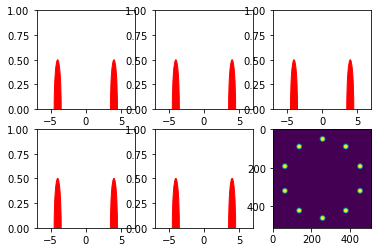

In [13]:
s.plot_2d()

In [6]:
# seeing what the Cluster looks like... Just note that these intensities are kind
# of suspect because there is no noise
print(cluster)
plt.imshow(cluster.get_diffraction())
plt.show()

<Cluster | Symmetry: 2| pos:[19.68812388  9.728741   16.89050045]>


AttributeError: 'Cluster' object has no attribute 'rotation_2d'

You can also just create a cluster yourself. I printed out the entire doc string for the Cluster class below. It should be pretty self explainatory.  The two rotations and the plane direction are a little confusing. Most likely the plane_direction shouldn't be there and that should be dealt with later.  Really you just need two rotation angles, one to rotate in plane and one to rotate randomly on a sphere.  The plane direction is just the vector that these are rotated around.  

In [7]:
help(Cluster)

Help on class Cluster in module SymSim.sim.cluster:

class Cluster(builtins.object)
 |  Cluster(symmetry=10, radius=1, k=4.0, position=array([0.39173948, 0.04514615]), rot_alpha=0, rot_beta=0, rot_gamma=0, rotation_2d=None, rotation_3d=None, plane_direction=[0, 0, 1], displacement=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, symmetry=10, radius=1, k=4.0, position=array([0.39173948, 0.04514615]), rot_alpha=0, rot_beta=0, rot_gamma=0, rotation_2d=None, rotation_3d=None, plane_direction=[0, 0, 1], displacement=None)
 |      Defines a sim with a symmetry of symmetry, a radius of radius in nm and position of position.
 |      
 |      Parameters:
 |      ----------------
 |      symmetry: int
 |          The symmetry of the sim being simulated
 |      radius: float
 |          The radius of the sim in nm
 |      position: tuple
 |          The position of the sim in the simulation cube
 |      rot_x, rot_y, rot_z: float
 |          The rotation around that axis for the
 |   

In [ ]:
clusters = [Cluster(symmetry=i) for i in range(2,11,2)]

In [ ]:
fig, subplots = plt.subplots(1,5, figsize=(20,30))
for p,c in zip(subplots, clusters):
    p.imshow(c.get_diffraction())
plt.show()

If you want to create just one column then you can just create a SimulationColumn object. This allows you to place multiple clusters in one column to simulate how multiple different symmetries might combine as you start to have more and more clusters overlapping.

In [7]:
from SymSim.sim.simulation_column import SimulationColumn

In [8]:
col = SimulationColumn()

In [9]:
 for i in range(2,11,2):
    col.append(Cluster(symmetry=i))

<Cluster | Symmetry: 2| pos:[0.90827132 0.69741433]>
<Cluster | Symmetry: 4| pos:[0.90827132 0.69741433]>
<Cluster | Symmetry: 6| pos:[0.90827132 0.69741433]>
<Cluster | Symmetry: 8| pos:[0.90827132 0.69741433]>
<Cluster | Symmetry: 10| pos:[0.90827132 0.69741433]>


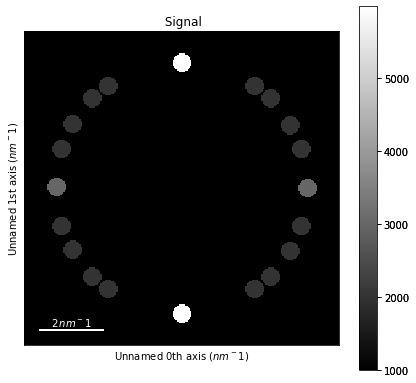

In [12]:
col.get_diffraction().plot()

If you want to look at multiple clusters you can create a SimulationCube object.  This is just a fancy list which you can add a bunch of clusters too.  From that point you can do some visualization stuff and then use that to try and recover the orginal symmetries. 

In [ ]:
from SymSim.sim.simulation_cube import SimulationCube

In [ ]:
cube = SimulationCube()

In [ ]:
# Right now the cube is just an empty list of clusters. 
print(cube)

In [4]:
# We can either populate the simulation cube randomly or just add in our clusters one by one
cube.append(clusters[1])

NameError: name 'cube' is not defined

In [5]:
#  Plotting the clusters.  The intensity is the mean of the intensity of the diffraction spots.  
cube.plot_symmetries()

NameError: name 'cube' is not defined

In [6]:
# Making a 4D STEM experiment
%matplotlib notebook
cube.get_4d_stem().plot()

NameError: name 'cube' is not defined

And Finally we have a fully random experiment.  I really know what this actually means but it might be something that we need to work on further...

In [13]:
print(cube)

<Cube of 1 clusters [20 x 20x 20nm]>


In [14]:
cube.add_random_clusters(num_clusters=100)

In [15]:
print(cube)

<Cube of 101 clusters [20 x 20x 20nm]>


<IPython.core.display.Javascript object>


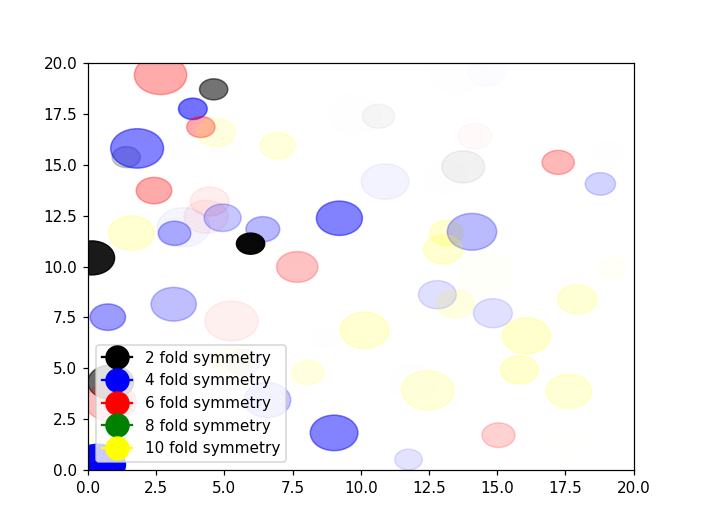

In [16]:
cube.plot_symmetries()

/home/carter/PycharmProjects/SymSim/SymSim/sim/cluster.py:137: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  radius=radius, shape=(num_pixels,num_pixels)) for k1 in k_rotated]
/home/carter/PycharmProjects/SymSim/SymSim/sim/simulation_cube.py:190: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  shape=(simulation_size[0], simulation_size[1]))

  0%|          | 0/16384 [00:00<?, ?it/s]Exception ignored in: <bound method tqdm.__del__ of   0%|<bar/>| 0/16384 [00:00<?, ?it/s]>
Traceback (most recent call last):
  File "/home/carter/PycharmProjects/SymSim/symsimdevelop/lib/python3.6/site-packages/tqdm/std.py", line 1124, in __del__
    self.close()
  File "/home/carter/PycharmProjects/SymSim/symsimdevelop/lib/python3.6/site-packages/tqdm/notebook.py", line 271, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'

  0%|          | 2/16384 [00:24<75:51:

<IPython.core.display.Javascript object>


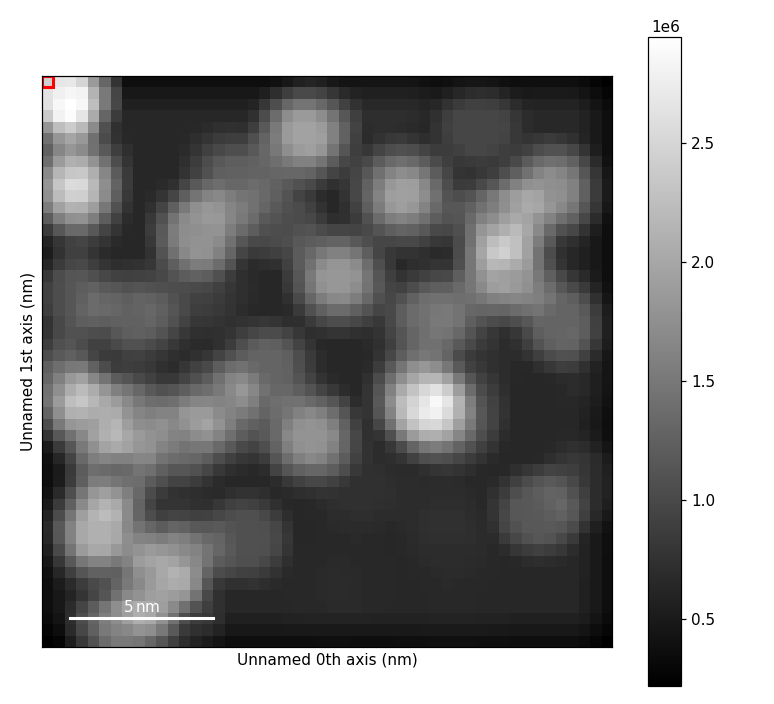

<IPython.core.display.Javascript object>


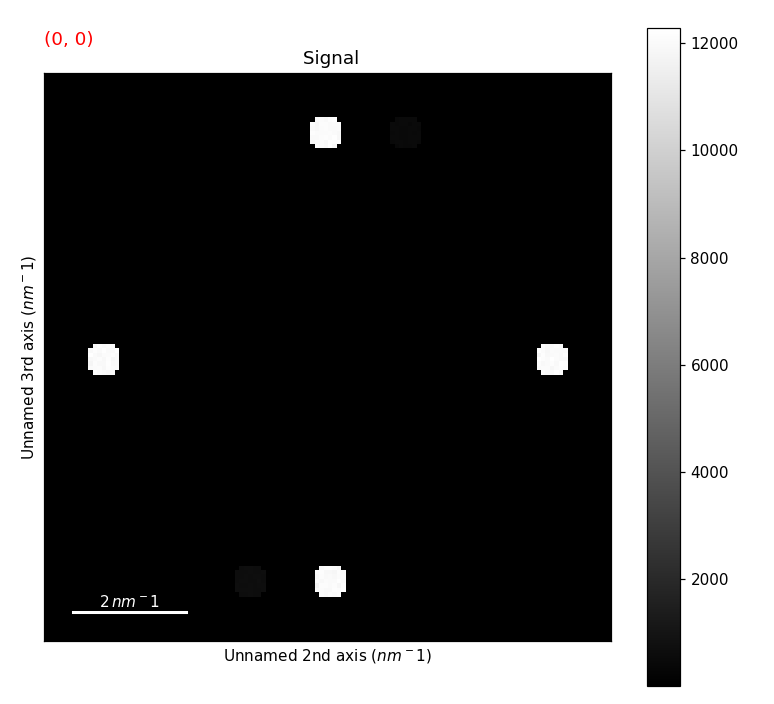

In [17]:
cube.get_4d_stem(convolve=True, noise=True).plot()